In [1]:
from __future__ import annotations

from pathlib import Path
from typing import Any

In [ ]:
import json

import pandas as pd


def load_json_file(filename: str | Path) -> dict[str, Any]:
    """Load the JSON file that was saved with safe_json_dump."""
    with Path(filename).open() as f:
        return json.load(f)


def flatten_dict(nested_dict: dict[str, Any], prefix: str = "") -> dict[str, Any]:
    """Flatten a nested dictionary structure into a single-level dictionary."""
    flattened = {}
    for key, value in nested_dict.items():
        if isinstance(value, dict):
            flattened.update(flatten_dict(value, f"{prefix}{key}_"))
        else:
            flattened[f"{prefix}{key}"] = value
    return flattened


def clean_column_name(col: str) -> str:
    """Clean column names by removing prefixes from dataset metrics columns."""
    if col.startswith("outputs_metrics_Error Identification Statistics_"):
        return col.replace("outputs_metrics_Error Identification Statistics_", "", 1)
    if col.startswith("outputs_metrics_Error Classification Statistics_"):
        return col.replace("outputs_metrics_Error Classification Statistics_", "", 1)
    if col.startswith(("outputs_metrics_T", "outputs_metrics_A")):
        return col.replace("outputs_metrics_", "", 1)
    return col


loaded_data = load_json_file(
    "/Users/patriciaskowronek/Documents/documentation_agent_few_shot_examples/results/20250508_results_gemini-2.5-pro_errors_and_skills.json"
)

flattened_data = [flatten_dict(data) for data in loaded_data.values()]
df = pd.DataFrame(flattened_data)

columns = [
    "outputs_metrics_Error Identification Statistics_Steps evaluated",
    "outputs_metrics_Error Identification Statistics_Errors evaluated",
    "outputs_metrics_Error Identification Statistics_Correct identifications",
    "outputs_metrics_Error Identification Statistics_Correct error identifications",
    "outputs_metrics_Error Identification Statistics_False negative count",
    "outputs_metrics_Error Identification Statistics_False positive count",
    "outputs_metrics_Error Identification Statistics_Addition by model",
    "outputs_metrics_Error Identification Statistics_Type Addition",
    "outputs_metrics_Error Identification Statistics_Type Deviation",
    "outputs_metrics_Error Identification Statistics_Type Omitted",
    "outputs_metrics_Error Identification Statistics_Type Error",
    "outputs_metrics_Error Identification Statistics_Type Deviation & Error",
    "outputs_metrics_Error Classification Statistics_Total errors analyzed",
    "outputs_metrics_Error Classification Statistics_Correctly classified errors",
    "outputs_eval_df",
    "outputs_metrics_Type Omitted",
    "outputs_metrics_Type Error",
    "outputs_metrics_Type Addition",
    "outputs_metrics_Type Deviation",
    "outputs_metrics_Type Deviation & Error",
    "outputs_metrics_Type Omitted Spatial",
    "outputs_metrics_Type Omitted GeneralKnowledge",
    "outputs_metrics_Type Omitted Fast",
    "outputs_metrics_Type Omitted ProteomicsKnowledge",
    "outputs_metrics_Type Error Spatial",
    "outputs_metrics_Type Error GeneralKnowledge",
    "outputs_metrics_Type Error Fast",
    "outputs_metrics_Type Error ProteomicsKnowledge",
    "outputs_metrics_Type Addition Spatial",
    "outputs_metrics_Type Addition GeneralKnowledge",
    "outputs_metrics_Type Addition Fast",
    "outputs_metrics_Type Addition ProteomicsKnowledge",
    "outputs_metrics_Type Deviation Spatial",
    "outputs_metrics_Type Deviation GeneralKnowledge",
    "outputs_metrics_Type Deviation Fast",
    "outputs_metrics_Type Deviation ProteomicsKnowledge",
    "outputs_metrics_Type Deviation & Error Spatial",
    "outputs_metrics_Type Deviation & Error GeneralKnowledge",
    "outputs_metrics_Type Deviation & Error Fast",
    "outputs_metrics_Type Deviation & Error ProteomicsKnowledge",
    "outputs_metrics_All Type Omitted",
    "outputs_metrics_All Type Error",
    "outputs_metrics_All Type Addition",
    "outputs_metrics_All Type Deviation",
    "outputs_metrics_All Type Deviation & Error",
    "outputs_metrics_All Type Omitted Spatial",
    "outputs_metrics_All Type Omitted GeneralKnowledge",
    "outputs_metrics_All Type Omitted Fast",
    "outputs_metrics_All Type Omitted ProteomicsKnowledge",
    "outputs_metrics_All Type Error Spatial",
    "outputs_metrics_All Type Error GeneralKnowledge",
    "outputs_metrics_All Type Error Fast",
    "outputs_metrics_All Type Error ProteomicsKnowledge",
    "outputs_metrics_All Type Addition Spatial",
    "outputs_metrics_All Type Addition GeneralKnowledge",
    "outputs_metrics_All Type Addition Fast",
    "outputs_metrics_All Type Addition ProteomicsKnowledge",
    "outputs_metrics_All Type Deviation Spatial",
    "outputs_metrics_All Type Deviation GeneralKnowledge",
    "outputs_metrics_All Type Deviation Fast",
    "outputs_metrics_All Type Deviation ProteomicsKnowledge",
    "outputs_metrics_All Type Deviation & Error Spatial",
    "outputs_metrics_All Type Deviation & Error GeneralKnowledge",
    "outputs_metrics_All Type Deviation & Error Fast",
    "outputs_metrics_All Type Deviation & Error ProteomicsKnowledge",
]
column_mapping = {col: clean_column_name(col) for col in columns}
df_renamed = df.rename(columns=column_mapping)

# TODO: Correct table entries where model was hallouzinating
# updates = {
# 'AnotherExperiment': {
#     'Steps evaluated': ,
#     'Errors evaluated': ,
#     'Correct identifications': ,
#     'Correct error identifications': ,
#     'False negative count': ,
#     'False positive count': ,
#     'Addition by model': ,
#     'Type Addition': ,
#     'Type Deviation': ,
#     'Type Omitted': ,
#     'Type Error': ,
#     'Type Deviation & Error': ,
#     'Total errors analyzed': ,
#     'Correctly classified errors':
# },
# }
# for exp_name, values in updates.items():
#     for col, val in values.items():
#         df_subset.loc[df_subset["experiment_name"] == exp_name, col] = val

# Calculate summary statistics
df_extended = df_renamed.copy()
df_extended["Steps evaluated minus added by AI"] = (
    df_extended["Steps evaluated"] - df_extended["Addition by model"]
)
df_extended["precision"] = (
    df_extended["Correct identifications"]
    / df_extended["Steps evaluated minus added by AI"]
)
df_extended["recall"] = (
    df_extended["Correct error identifications"] / df_extended["Errors evaluated"]
)
df_extended["classification_accuracy"] = (
    df_extended["Correctly classified errors"] / df_extended["Total errors analyzed"]
)

sum_cols = [
    "Steps evaluated",
    "Steps evaluated minus added by AI",
    "Errors evaluated",
    "Correct identifications",
    "Correct error identifications",
    "False negative count",
    "False positive count",
    "Addition by model",
    "Type Deviation",
    "Type Omitted",
    "Type Error",
    "Type Addition",
    "Type Deviation",
    "Type Deviation & Error",
    "Type Omitted Spatial",
    "Type Omitted GeneralKnowledge",
    "Type Omitted Fast",
    "Type Omitted ProteomicsKnowledge",
    "Type Error Spatial",
    "Type Error GeneralKnowledge",
    "Type Error Fast",
    "Type Error ProteomicsKnowledge",
    "Type Addition Spatial",
    "Type Addition GeneralKnowledge",
    "Type Addition Fast",
    "Type Addition ProteomicsKnowledge",
    "Type Deviation Spatial",
    "Type Deviation GeneralKnowledge",
    "Type Deviation Fast",
    "Type Deviation ProteomicsKnowledge",
    "Type Deviation & Error Spatial",
    "Type Deviation & Error GeneralKnowledge",
    "Type Deviation & Error Fast",
    "Type Deviation & Error ProteomicsKnowledge",
    "All Type Omitted",
    "All Type Error",
    "All Type Addition",
    "All Type Deviation",
    "All Type Deviation & Error",
    "All Type Omitted Spatial",
    "All Type Omitted GeneralKnowledge",
    "All Type Omitted Fast",
    "All Type Omitted ProteomicsKnowledge",
    "All Type Error Spatial",
    "All Type Error GeneralKnowledge",
    "All Type Error Fast",
    "All Type Error ProteomicsKnowledge",
    "All Type Addition Spatial",
    "All Type Addition GeneralKnowledge",
    "All Type Addition Fast",
    "All Type Addition ProteomicsKnowledge",
    "All Type Deviation Spatial",
    "All Type Deviation GeneralKnowledge",
    "All Type Deviation Fast",
    "All Type Deviation ProteomicsKnowledge",
    "All Type Deviation & Error Spatial",
    "All Type Deviation & Error GeneralKnowledge",
    "All Type Deviation & Error Fast",
    "All Type Deviation & Error ProteomicsKnowledge",
]

mean_cols = ["precision", "recall", "classification_accuracy"]

summary = pd.DataFrame(
    {  # Create a summary row
        "inputs_experiment_name": ["Summary"],
        **{col: [df_extended[col].sum()] for col in sum_cols},
        **{col: [df_extended[col].mean()] for col in mean_cols},
    }
)

df_with_summary = pd.concat([df_extended, summary], ignore_index=True)
df_with_summary[
    [
        "inputs_experiment_name",
        "Steps evaluated",
        "Steps evaluated minus added by AI",
        "Errors evaluated",
        "Correct identifications",
        "Correct error identifications",
        "False negative count",
        "False positive count",
        "Addition by model",
        "Type Deviation",
        "Type Omitted",
        "Type Error",
        "Type Addition",
        "Type Deviation",
        "Type Deviation & Error",
        "precision",
        "recall",
        "classification_accuracy",
    ]
]

,inputs_experiment_name,Steps evaluated,Steps evaluated minus added by AI,Errors evaluated,Correct identifications,Correct error identifications,False negative count,False positive count,Addition by model,Type Deviation,Type Omitted,Type Error,Type Addition,Type Deviation,Type Deviation & Error,precision,recall,classification_accuracy
0,PlaceEvotips_docuCorrect,7,7,1,6,1,0,1,0,0,1,0,0,0,0,0.857143,1.000000,1.000000
1,PlaceEvotips_docuWrongPosition,9,7,3,5,1,2,0,2,0,1,0,0,0,0,0.714286,0.333333,1.000000
2,PlaceEvotips_docuLiquidNotChecked,11,7,3,6,3,0,1,4,0,3,0,0,0,0,0.857143,1.000000,1.000000
3,PlaceEvotips_docuBoxAngeled,17,7,2,5,1,1,1,10,0,1,0,0,0,0,0.714286,0.500000,1.000000
4,ConnectingColumnSampleLine_docuWithoutStandbyA...,15,15,6,11,5,1,3,0,0,5,0,0,0,0,0.733333,0.833333,1.000000
5,ESIsourceToUltraSource_docuCorrect,29,29,1,23,1,0,6,0,0,1,0,0,0,0,0.793103,1.000000,1.000000
6,ESIsourceToUltraSource_docuFogotOvenPowerSupply,29,29,7,18,1,6,5,0,1,0,0,0,1,0,0.620690,0.142857,0.000000
7,UltraSourceToESIsource_docuCorrect,26,25,0,21,0,0,4,1,0,0,0,0,0,0,0.840000,NaN,NaN
8,UltraSourceToESIsource_docuForgotN2Line,26,25,1,21,0,1,3,1,0,0,0,0,0,0,0.840000,0.000000,NaN
9,UltraSourceToESIsource_docuForgotGlovesANDCapi...,25,25,2,19,0,2,4,0,0,0,0,0,0,0,0.760000,0.000000,NaN


In [69]:
# to analyze individual LLM responses
# display(Markdown(loaded_data['PlaceEvotips_docuCorrect']['outputs']['lab_notes']))

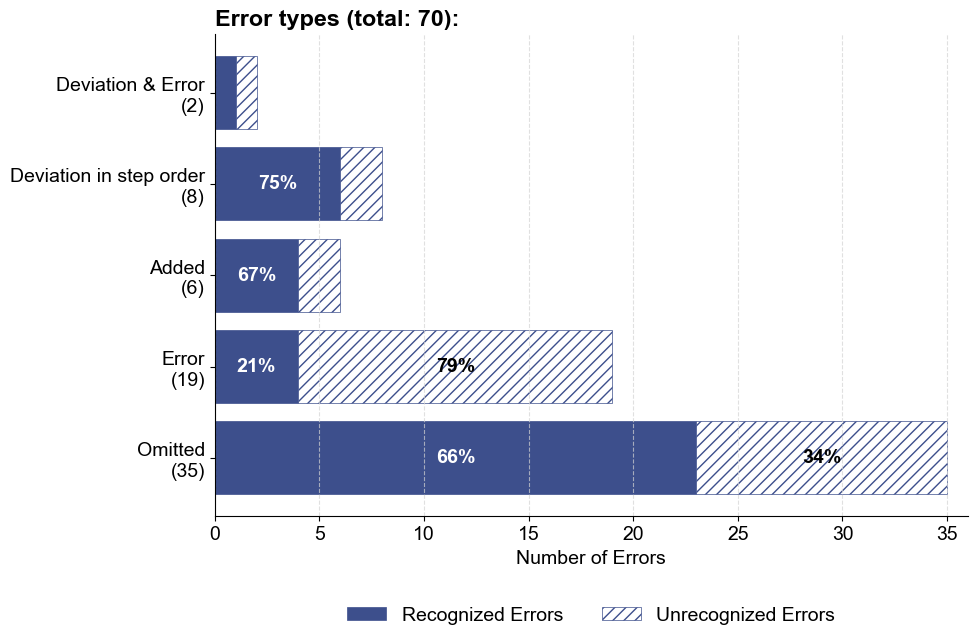

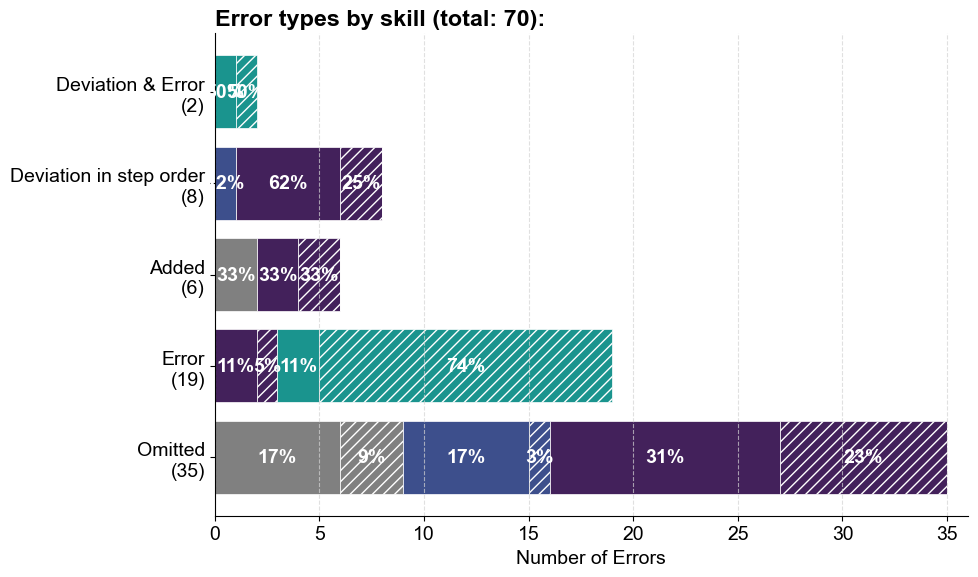

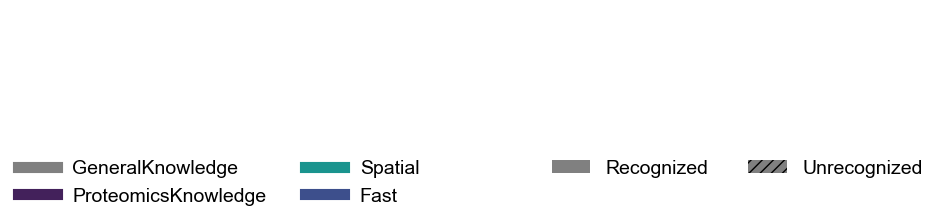

In [70]:
import matplotlib as mpl
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.lines import Line2D

mpl.rcParams["font.family"] = "Arial"
plt.rcParams.update({"font.size": 14})
mpl.rcParams["pdf.fonttype"] = 42

figure_size = (10, 6)
bar_height = 0.8
title_fontsize = 14
x_label = "Number of Errors"
grid_style = {"linestyle": "--", "alpha": 0.7, "color": "lightgray"}
legend_position = {
    "loc": "upper center",
    "bbox_to_anchor": (0.5, -0.15),
    "ncol": 5,
    "frameon": False,
}


def transform_to_data_structure(df_row: pd.Series) -> list[dict[str, Any]]:
    """Transform a DataFrame row to the required data structure for visualization.

    Args:
        df_row: A row from df_with_summary (can be accessed via df_with_summary.iloc[0])

    Returns:
        List of dictionaries in the format required for the visualization

    """
    error_type_mapping = {
        "Omitted": "Omitted",
        "Error": "Error",
        "Deviation": "Deviation in step order",
        "Addition": "Added",
        "Deviation & Error": "Deviation & Error",
    }

    data = []
    for error_type in [
        "Omitted",
        "Error",
        "Addition",
        "Deviation",
        "Deviation & Error",
    ]:
        total_column = f"All Type {error_type}"
        if total_column not in df_row or df_row[total_column] == 0:
            continue

        # For "Deviation", we need to map to "Deviation in step order" in the output
        display_name = error_type_mapping.get(error_type, error_type)
        entry = {"name": display_name, "total": int(df_row[total_column])}

        skills = ["Spatial", "GeneralKnowledge", "Fast", "ProteomicsKnowledge"]
        for skill in skills:
            recognized_col = f"Type {error_type} {skill}"
            recognized_value = (
                int(df_row[recognized_col])
                if recognized_col in df_row and df_row[recognized_col] > 0
                else 0
            )

            all_col = f"All Type {error_type} {skill}"
            all_value = (
                int(df_row[all_col]) if all_col in df_row and df_row[all_col] > 0 else 0
            )

            unrecognized_value = all_value - recognized_value

            if recognized_value > 0:
                entry[f"{skill}-Recognized"] = recognized_value
            if unrecognized_value > 0:
                entry[f"{skill}-Unrecognized"] = unrecognized_value

        data.append(entry)

    return data


def set_common_style(ax: plt.Axes, max_x_value: int, title: str) -> None:
    """Apply common style elements to both plots.

    Sets consistent styling for visualizations including title, labels, grid, and spine visibility.

    Args:
        ax: The matplotlib axes object to style
        max_x_value: max bar length
        title: The title text to display on the plot

    """
    ax.set_title(title, fontweight="bold", loc="left")
    ax.set_xlabel(x_label)
    ax.set_xlim(0, max_x_value + 1)
    ax.xaxis.grid(visible=True, **grid_style)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    plt.tight_layout()


def create_simple_error_chart_bw(
    error_types: list[str],
    total_counts: list[float | int],
    recognized: list[float | int],
    save_path: str = "error_types_chart_bw.png",
) -> tuple[plt.Figure, plt.Axes]:
    """Create basic error chart with recognized/unrecognized split in strict black and white.

    Generates a horizontal bar chart showing error types with recognized and unrecognized portions
    using only black and white colors with different patterns for distinction.

    Args:
        error_types: List of error type names
        total_counts: List of total error counts for each error type
        recognized: List of recognized error counts for each error type
        save_path: File path to save the generated chart

    Returns:
        Tuple containing the figure and axes objects

    """
    # Constants
    min_width_for_label = 2

    unrecognized = [total - rec for total, rec in zip(total_counts, recognized)]

    fig, ax = plt.subplots(figsize=figure_size)
    fig.patch.set_facecolor("white")
    ax.set_facecolor("white")
    y_pos = np.arange(len(error_types))

    ax.barh(
        y_pos,
        recognized,
        color="#3D4F8C",  # "black",
        label="Recognized Errors",
        edgecolor="#3D4F8C",  # "black",
        linewidth=0.5,
    )

    ax.barh(
        y_pos,
        unrecognized,
        left=recognized,
        color="white",
        hatch="///",
        label="Unrecognized Errors",
        edgecolor="#3D4F8C",  # "grey",
        linewidth=0.5,
    )

    for i, (rec, unrec) in enumerate(zip(recognized, unrecognized)):
        if rec > min_width_for_label:
            percentage = round((rec / total_counts[i]) * 100)
            ax.text(
                rec / 2,
                i,
                f"{percentage}%",
                va="center",
                ha="center",
                color="white",
                fontweight="bold",
            )

        if unrec > min_width_for_label:
            percentage = round((unrec / total_counts[i]) * 100)
            ax.text(
                rec + unrec / 2,
                i,
                f"{percentage}%",
                va="center",
                ha="center",
                color="black",
                fontweight="bold",
            )

    ax.set_yticks(y_pos)
    ax.set_yticklabels(
        [f"{err}\n({total})" for err, total in zip(error_types, total_counts)]
    )

    max_x_value = max(total_counts)
    set_common_style(ax, max_x_value, f"Error types (total: {sum(total_counts)}):")

    ax.legend(
        loc=legend_position["loc"],
        bbox_to_anchor=legend_position["bbox_to_anchor"],
        ncol=2,
        frameon=legend_position["frameon"],
    )

    plt.savefig(save_path, dpi=300, bbox_inches="tight")
    return fig, ax


def create_skills_error_chart(
    data: list[dict[str, Any]],
    total_counts: list[float | int],
    skill_colors: dict[str, str],
    save_path: str = "error_types_by_skill_recognition_percent.png",
) -> tuple[plt.Figure, plt.Axes]:
    """Create error chart with skills breakdown showing percentages.

    Generates a horizontal bar chart showing error types broken down by skills and recognition status,
    with percentage values displayed instead of raw counts.

    Args:
        data: List of dictionaries containing error data
        total_counts: List of total error counts for each error type
        skill_colors: Dictionary mapping skill names to their display colors
        save_path: File path to save the generated chart

    Returns:
        Tuple containing the figure and axes objects

    """
    min_percentage_for_text = 0  # Minimum percentage width to display text

    df = pd.DataFrame(data)
    melted_data = []
    for row in data:
        error_type = row["name"]
        total = row["total"]
        for col in row:
            if col not in ["name", "total"]:
                skill, status = col.split("-")
                count = row[col]
                percentage = (count / total) * 100 if total > 0 else 0
                melted_data.append(
                    {
                        "Error Type": error_type,
                        "Total": total,
                        "Skill": skill,
                        "Status": status,
                        "Count": count,
                        "Percentage": percentage,
                    }
                )
    melted_df = pd.DataFrame(melted_data)

    def get_color_and_hatch(row: pd.Series) -> tuple[str, str | None]:
        color = skill_colors[row["Skill"]]
        hatch = "///" if row["Status"] == "Unrecognized" else None
        return color, hatch

    error_types = df["name"].unique()
    skill_status_combinations = (
        melted_df[["Skill", "Status"]].drop_duplicates().reset_index(drop=True)
    )

    fig, ax = plt.subplots(figsize=figure_size)
    y_positions = np.arange(len(error_types))
    cumulative_widths = np.zeros(len(error_types))

    for _, row in skill_status_combinations.iterrows():
        skill = row["Skill"]
        status = row["Status"]
        filtered_data = melted_df[
            (melted_df["Skill"] == skill) & (melted_df["Status"] == status)
        ]
        counts_by_error = {
            x["Error Type"]: x["Count"] for _, x in filtered_data.iterrows()
        }
        percentages_by_error = {
            x["Error Type"]: x["Percentage"] for _, x in filtered_data.iterrows()
        }
        widths = [counts_by_error.get(error, 0) for error in error_types]
        color, hatch = get_color_and_hatch(row)

        ax.barh(
            y_positions,
            widths,
            height=bar_height,
            left=cumulative_widths,
            color=color,
            hatch=hatch,
            edgecolor="white",
            linewidth=0.5,
        )

        for i, (width, cum_width) in enumerate(zip(widths, cumulative_widths)):
            if width > 0:
                error_type = error_types[i]
                percentage = percentages_by_error.get(error_type, 0)
                if percentage >= min_percentage_for_text:
                    text_x = cum_width + width / 2
                    ax.text(
                        text_x,
                        y_positions[i],
                        f"{percentage:.0f}%",  # Format as integer percentage
                        ha="center",
                        va="center",
                        color="white",
                        fontweight="bold",
                    )
        cumulative_widths += widths

    ax.set_yticks(y_positions)
    ax.set_yticklabels(
        [
            f"{error_type}\n({df[df['name'] == error_type]['total'].to_numpy()[0]})"
            for error_type in error_types
        ]
    )

    max_x_value = max(total_counts)
    set_common_style(
        ax, max_x_value, f"Error types by skill (total: {sum(df['total'])}):"
    )

    plt.savefig(save_path, dpi=300, bbox_inches="tight")
    return fig, ax


def create_standalone_legend(
    skill_colors: dict[str, str],
    save_path: str = "legend.png",
) -> plt.Figure:
    """Create a standalone legend figure and save it separately.

    Args:
        skill_colors: Dictionary mapping skill names to their colors
        save_path: File path to save the legend image

    Returns:
        The legend figure

    """
    legend_fig = plt.figure(figsize=(10, 1.5))  # Adjust size as needed
    legend_ax = legend_fig.add_subplot(111)

    legend_ax.axis("off")

    legend_elements = []

    for skill, color in skill_colors.items():
        legend_elements.append(Line2D([0], [0], color=color, lw=8, label=skill))

    legend_elements.append(Line2D([0], [0], color="white", lw=0, label=""))
    legend_elements.append(mpatches.Patch(facecolor="gray", label="Recognized"))
    legend_elements.append(
        mpatches.Patch(facecolor="gray", hatch="///", label="Unrecognized")
    )

    legend_ax.legend(
        handles=legend_elements,
        loc=legend_position["loc"],
        bbox_to_anchor=legend_position["bbox_to_anchor"],
        ncol=legend_position["ncol"],
        frameon=legend_position["frameon"],
    )

    legend_fig.savefig(save_path, dpi=300, bbox_inches="tight")

    return legend_fig


# Data for the first plot
error_types = [
    "Omitted",
    "Error",
    "Added",
    "Deviation in step order",
    "Deviation & Error",
]
total_counts = (
    df_with_summary[
        [
            "All Type Omitted",
            "All Type Error",
            "All Type Addition",
            "All Type Deviation",
            "All Type Deviation & Error",
        ]
    ]
    .iloc[-1]
    .to_numpy()
)
recognized = (
    df_with_summary[
        [
            "Type Omitted",
            "Type Error",
            "Type Addition",
            "Type Deviation",
            "Type Deviation & Error",
        ]
    ]
    .iloc[-1]
    .to_numpy()
)

# Data for the second plot
data = transform_to_data_structure(df_with_summary.iloc[-1])


skill_colors = {
    "GeneralKnowledge": "grey",
    "ProteomicsKnowledge": "#43215B",  # Purple
    "Spatial": "#1A948E",  # Teal
    "Fast": "#3D4F8C",  # Blue
}

folder = (
    "/Users/patriciaskowronek/Documents/documentation_agent_few_shot_examples/results/"
)
fig1, ax1 = create_simple_error_chart_bw(
    error_types, total_counts, recognized, folder + "error_types_chart.png"
)
fig2, ax2 = create_skills_error_chart(
    data, total_counts, skill_colors, folder + "error_types_by_skill_recognition.png"
)
create_standalone_legend(skill_colors, save_path=folder + "legend.png")
plt.show()

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'left': 'Error types (total: 70):'}, xlabel='Number of Errors'>)

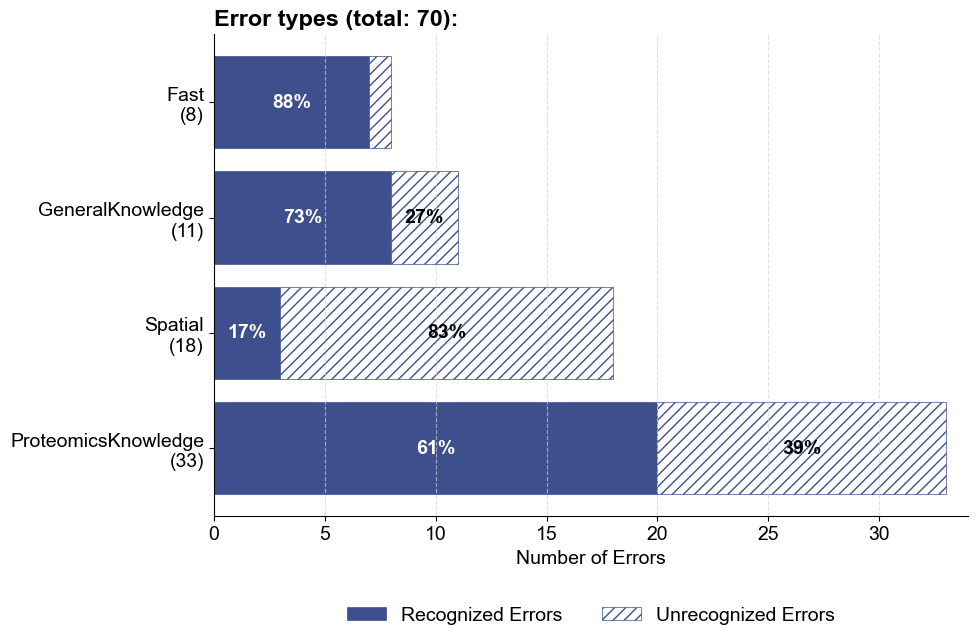

In [71]:
def calculate_skill_totals(df_row: pd.Series) -> dict[str, float]:
    """Calculate the sum of values for each skill across Type and All Type categories.

    Args:
        df_row: A single row from df_with_summary

    Returns:
        Dict containing the summed values for each skill category

    """
    skills = ["Spatial", "GeneralKnowledge", "Fast", "ProteomicsKnowledge"]
    error_types = ["Omitted", "Error", "Addition", "Deviation", "Deviation & Error"]

    results = {}

    for skill in skills:
        type_sum = 0
        for error_type in error_types:
            column = f"Type {error_type} {skill}"
            if column in df_row:
                type_sum += df_row[column]

        results[f"Type {skill}"] = type_sum

    for skill in skills:
        all_type_sum = 0
        for error_type in error_types:
            column = f"All Type {error_type} {skill}"
            if column in df_row:
                all_type_sum += df_row[column]

        results[f"All Type {skill}"] = all_type_sum

    return results


last_row = df_with_summary.iloc[-1]
skill_totals = calculate_skill_totals(last_row)
skill_totals_df = pd.DataFrame([skill_totals])

create_simple_error_chart_bw(
    ["ProteomicsKnowledge", "Spatial", "GeneralKnowledge", "Fast"],
    skill_totals_df[
        [
            "All Type ProteomicsKnowledge",
            "All Type Spatial",
            "All Type GeneralKnowledge",
            "All Type Fast",
        ]
    ]
    .iloc[-1]
    .to_numpy(),
    skill_totals_df[
        [
            "Type ProteomicsKnowledge",
            "Type Spatial",
            "Type GeneralKnowledge",
            "Type Fast",
        ]
    ]
    .iloc[-1]
    .to_numpy(),
    folder + "skill_types_chart_bw.png",
)

Statistics for lab_notes_generate_time:
  mean: 157.29 seconds
  median: 157.98 seconds
  std: 46.46 seconds
  min: 78.71 seconds
  max: 288.81 seconds

Statistics for eval_generate_time:
  mean: 125.88 seconds
  median: 125.69 seconds
  std: 38.76 seconds
  min: 67.50 seconds
  max: 230.23 seconds

Statistics for total generation time:
  mean: 283.17 seconds
  median: 285.69 seconds
  std: 60.45 seconds
  min: 184.72 seconds
  max: 442.88 seconds


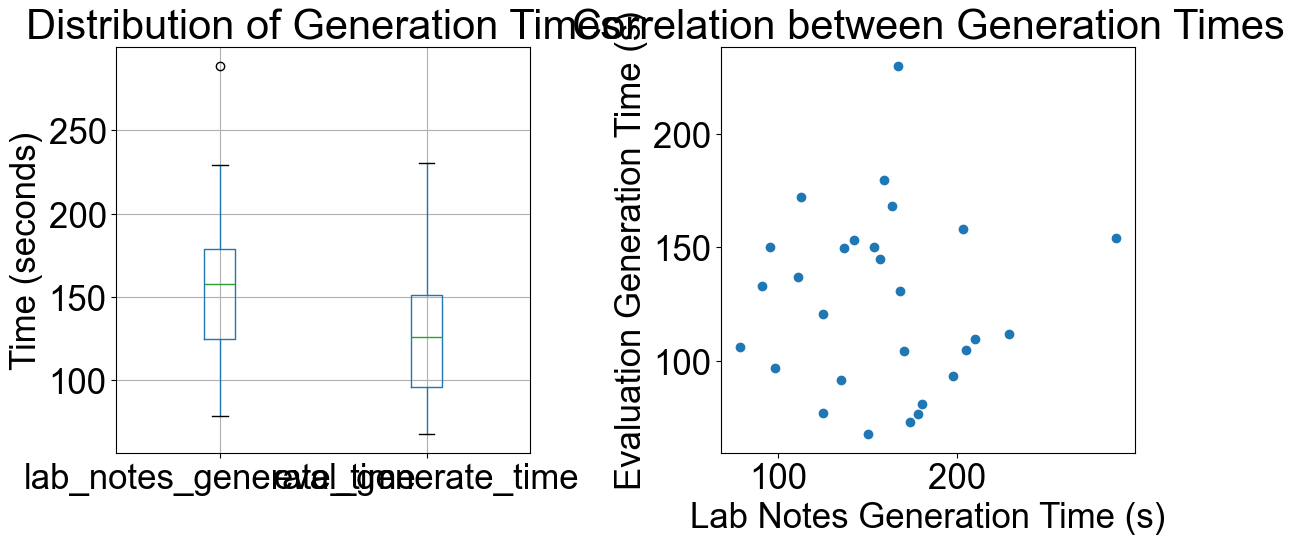

In [72]:
plt.rcParams.update({"font.size": 25})

timing_data = []

for experiment_name, experiment_data in loaded_data.items():
    if "outputs" in experiment_data:
        outputs = experiment_data["outputs"]

        lab_notes_time = outputs.get("lab_notes_generate_time")
        eval_time = outputs.get("eval_generate_time")

        timing_data.append(
            {
                "experiment_name": experiment_name,
                "lab_notes_generate_time": lab_notes_time,
                "eval_generate_time": eval_time,
                "total_generate_time": (lab_notes_time or 0) + (eval_time or 0),
            }
        )

df_timing = pd.DataFrame(timing_data)

stats = {
    "lab_notes_time": {
        "mean": df_timing["lab_notes_generate_time"].mean(),
        "median": df_timing["lab_notes_generate_time"].median(),
        "std": df_timing["lab_notes_generate_time"].std(),
        "min": df_timing["lab_notes_generate_time"].min(),
        "max": df_timing["lab_notes_generate_time"].max(),
    },
    "eval_time": {
        "mean": df_timing["eval_generate_time"].mean(),
        "median": df_timing["eval_generate_time"].median(),
        "std": df_timing["eval_generate_time"].std(),
        "min": df_timing["eval_generate_time"].min(),
        "max": df_timing["eval_generate_time"].max(),
    },
    "total_time": {
        "mean": df_timing["total_generate_time"].mean(),
        "median": df_timing["total_generate_time"].median(),
        "std": df_timing["total_generate_time"].std(),
        "min": df_timing["total_generate_time"].min(),
        "max": df_timing["total_generate_time"].max(),
    },
}

print("Statistics for lab_notes_generate_time:")
for key, value in stats["lab_notes_time"].items():
    print(f"  {key}: {value:.2f} seconds")

print("\nStatistics for eval_generate_time:")
for key, value in stats["eval_time"].items():
    print(f"  {key}: {value:.2f} seconds")

print("\nStatistics for total generation time:")
for key, value in stats["total_time"].items():
    print(f"  {key}: {value:.2f} seconds")

# Create a visualization
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
df_timing[["lab_notes_generate_time", "eval_generate_time"]].boxplot()
plt.ylabel("Time (seconds)")
plt.title("Distribution of Generation Times")

plt.subplot(1, 2, 2)
plt.scatter(df_timing["lab_notes_generate_time"], df_timing["eval_generate_time"])
plt.xlabel("Lab Notes Generation Time (s)")
plt.ylabel("Evaluation Generation Time (s)")
plt.title("Correlation between Generation Times")

plt.tight_layout()
plt.savefig(
    "/Users/patriciaskowronek/Documents/documentation_agent_few_shot_examples/results/generation_time_statistics.png",
    dpi=300,
)
plt.show()